# BREAKING NEWS

## Motivation
In the wake of the November 2015 Paris attacks that killed 128 people, Facebook users across the world expressed their support for Parisians by adding [French flag filters to their profiles](http://time.com/4113171/paris-attacks-facebook-filter-french-flag-profile-picture/) and posting statuses like "Pray for Paris". Yet some observers noted that at the same time, [more than 2000 Nigerians were killed by the Boko Haram](http://www.theguardian.com/world/2015/jan/12/-sp-boko-haram-attacks-nigeria-baga-ignored-media)and [an al-Shabab attack killed 147 Kenyans](http://www.bbc.com/news/blogs-trending-34833134) but received little media attention. These imbalances in coverage raise the question, what does it take for the general public to care about a tragedy? Do people expect more deaths in countries outside the general "Western world"\* such that they are not shocked unless there is a sufficiently terrible catastrophe?

\*"Western world" is something of a [nebulous term](https://en.wikipedia.org/wiki/Western_world) and we don't use it in a particularly precise way here.

## Experiment

We tested, for different countries, what magnitude of disaster is necessary to get American's attention by measuring people's expectations for casualties in news stories. We had each participant read a short Facebook post+news story about an earthquake in a particular country, varying the country across participants. To limit how well they read the passage, we gave them ten seconds to read it (short enough that subjects could get a gist of the article, but had to rely on their general expectations to remember the exact number of casualties). 

The articles went as followed:

![example of stimulus](samp_stim.png)

We varied the countries and cities across participants:
* Abuja, Nigeria
* Takasaki, Japan
* Okara, Pakistan
* Brownsville, Texas, United States (given that we limited our subject pool to Americans, we added more resolution)
* Rennes, France
* Taganrog, Russia
* TO DO: UPDATE FOR NEW COUNTRIES

We chose cities with comparable populations (although it is unlikely our participants have heard of these places). For this initial pilot, we kept the number of casualties and name constant at 211 and Jeffrey Smith, respectively.

After reading this, we asked participants (in order)

1. Who wrote the post?
2. Where did the earthquake strike?
3. How many casualties were there?

We expect that the expected number of casualties will be higher for countries that are farther removed from the United States and/or where the American media frequently reports large numbers of deaths.

Planned analyses (3/29/2016)
* How accurate are people for names and countries?
* Different predictor variables (real-world covariates)
* Versions with and without correction answers
* digit heterogeneity? (weird but uhhh sure?)


In [124]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(style="white", color_codes=True)

countries=['Nigeria','Japan','Pakistan','United States','France','Russia', \
          'Indonesia','Mexico','Rwanda','Haiti','Jordan','Cuba', \
          'Liberia','North Korea','Syria','Iraq','Yemen','Ukraine', \
          'Afghanistan','Turkey','Venezuela','Egypt','Iran','Saudi Arabia', \
          'China','Israel','Greece','Nepal','England','New Zealand', \
          'Germany','Spain','Thailand','South Africa','India','Australia', \
          'Brazil','Canada','Belgium','Netherlands'] # These are mapped onto art_id in our dataset

Let's get our data

In [125]:
def load_data(fname):
    stereo_file=open(fname,'rU')
    stereo_read=csv.reader(stereo_file, quotechar="'")
    
    true_country=[]
    resp_country=[]
    resp_poster=[]
    resp_casualties=[]
    resp_casualties_raw=[]
    
    for row in stereo_read:
        if row[12]!='':
            true_country.append(row[5])
            resp_country.append(row[10])
            resp_poster.append(row[11])
            resp_casualties.append(float(row[12]))
            resp_casualties_raw.append(row[12])

    all_data={'true_country':np.array(true_country),'resp_country':resp_country, \
              'resp_poster':resp_poster,'resp_casualties':np.array(resp_casualties),\
             'resp_casualties_raw':np.array(resp_casualties_raw)}
    return all_data

all_data=load_data('mturk_data_itNews_v3.csv')
correct=261
correct_log10=np.log10(correct)

In [126]:
a,country_count=np.unique(all_data['true_country'],return_counts=True)
print np.array([countries,country_count])

[['Nigeria' 'Japan' 'Pakistan' 'United States' 'France' 'Russia'
  'Indonesia' 'Mexico' 'Rwanda' 'Haiti' 'Jordan' 'Cuba' 'Liberia'
  'North Korea' 'Syria' 'Iraq' 'Yemen' 'Ukraine' 'Afghanistan' 'Turkey'
  'Venezuela' 'Egypt' 'Iran' 'Saudi Arabia' 'China' 'Israel' 'Greece'
  'Nepal' 'England' 'New Zealand' 'Germany' 'Spain' 'Thailand'
  'South Africa' 'India' 'Australia' 'Brazil' 'Canada' 'Belgium'
  'Netherlands']
 ['27' '34' '32' '33' '31' '31' '33' '37' '29' '25' '34' '31' '33' '31'
  '34' '28' '28' '34' '32' '33' '27' '32' '33' '32' '32' '29' '33' '27'
  '33' '30' '31' '28' '28' '32' '33' '31' '31' '32' '36' '29']]


## How many casualties did people expect?
Let's see how many casualties people expected overall. 

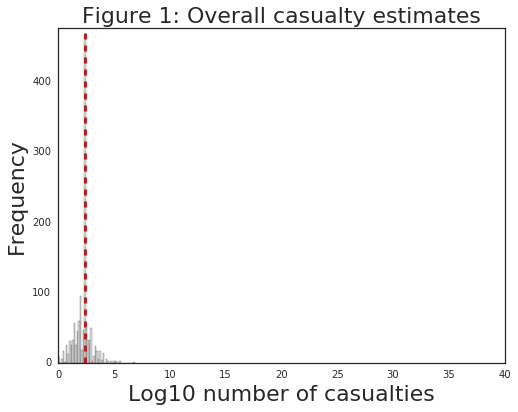

In [127]:
all_data['resp_casualties_log10']=np.log10(all_data['resp_casualties'])

plt.figure(figsize=(8,6))

n, bins, patches = plt.hist(all_data['resp_casualties_log10'], 50, facecolor='lightgrey', alpha=0.75)

# add a 'best fit' line
l = plt.plot([correct_log10,correct_log10], [0,np.max(n)+10], 'b--', linewidth=3,c='firebrick')

plt.title('Figure 1: Overall casualty estimates',fontsize='22')
plt.xlabel('Log10 number of casualties',fontsize='22')
plt.ylabel('Frequency',fontsize='22')
plt.axis([0, len(country_count), 0, np.max(n)+10])


plt.show()

Here is a histogram of how many casualties people reported. The dashed red line is the correct answer (hence why it's so frequent).

Now let's divide this up by country

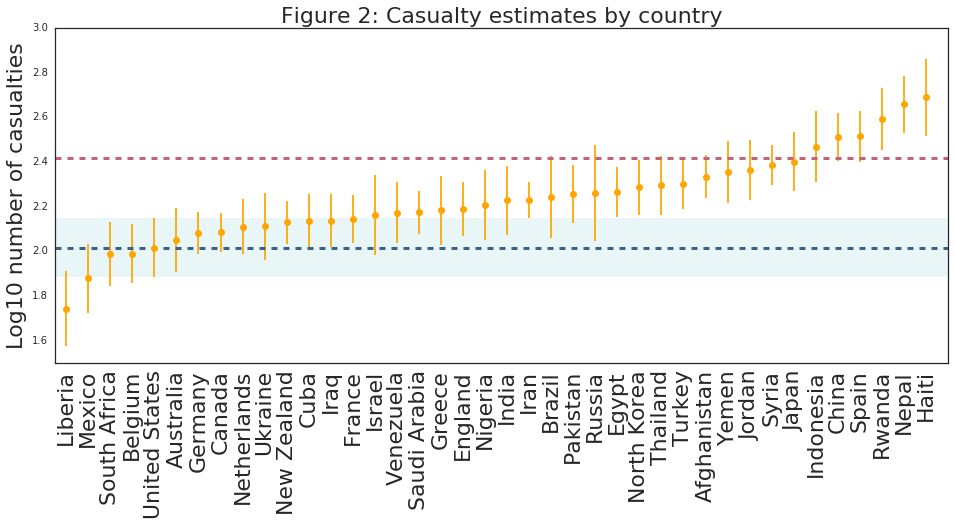

In [130]:
country_log10_mean=[]
country_log10_sem=[]
for tc in range(len(country_count)):
    country_log10_mean.append(np.mean(all_data['resp_casualties_log10'][all_data['true_country']==str(tc)]))
    country_log10_sem.append(np.std(all_data['resp_casualties_log10'][all_data['true_country']==str(tc)]) \
                             /np.sqrt(np.sum([all_data['true_country']==str(tc)])))    

country_sort=np.argsort(country_log10_mean)
country_log10_mean_2=[country_log10_mean[i] for i in country_sort]
country_log10_sem_2=[country_log10_sem[i] for i in country_sort]
countries2=[countries[i] for i in country_sort]

plt.figure(figsize=(16,6))

plt.title('Figure 2: Casualty estimates by country',fontsize='22')

# US properties
us_mean=country_log10_mean[3]
us_sem=country_log10_sem[3]
us_lo=us_mean-us_sem
us_hi=us_mean+us_sem
plt.fill_between([-.5, len(country_log10_mean)],[us_lo,us_lo], [us_hi,us_hi],\
                facecolor='#e1f3f6',edgecolor='white',alpha=.75)
plt.plot([-.5, len(country_log10_mean)],[us_mean,us_mean], 'b--', linewidth=3,c='#396487')

# Correct
plt.plot([-.5, len(country_log10_mean)],[correct_log10,correct_log10], 'b--', linewidth=3,c='#c56179')

plt.errorbar(range(len(country_log10_mean)), country_log10_mean_2, yerr=country_log10_sem_2,c='orange',fmt='o')
plt.ylabel('Log10 number of casualties',fontsize='22')

plt.xticks(range(len(country_log10_mean)), countries2, rotation='90',fontsize=22)
plt.axis([-.5, len(country_log10_mean), 1.5, 3.0])
plt.show()

Red dashed line is the correct answer, blue-patch is +/-1 SEM for the United States

Some interesting things to note and some speculation which is entirely post-hoc and should be not be treated seriously:
1. The United States and Mexico are very close. This may reflect the fact that we used "Texas" to represent the US (due to an earlier iteration in which we tried to match country/state sizes) and [Mechanical Turk users skewing liberal](http://themonkeycage.org/2012/12/how-representative-are-amazon-mechanical-turk-workers/) or Texas being right next to Mexico.
2. Liberia is really low. This is perplexing but may be due to Americans not knowing what Liberia is and assuming it is a small country. We quickly asked some people who walked by our lab what they knew about Liberia and the most common answer was "Nothing?"
3. Spain is really high. We're not sure what's going on with that
4. Iraq is low while Afghanistan is high. This may be because the US has more troops deployed in Iraq compared to Afghanistan, whereas the US involvement during the Afghanistan war was more limited.

# Interim summary

We are seeing some really fascinating patterns that capture people's expectations about tragedies in different countries. However, it's important to note that any conclusions will be correlational and that a different experiment will be necessary to make causal claims.

There are three next steps that we're planning on taking to really flesh our findings out:

1. Compare to real-world statistics on possible predictors (GDP, physical distance, tourism, article mentions, etc.)-We currently don't have a quantitative explanation for these results, just our general intuitions. People might be relying on some combination of these cues to reason about the articles
2. Examine how these biases change as they propogate through social networks-On Facebook and other social networks, people don't just read the posts; they also remember then, form their own impression of it and construct a new post. As that process repeats, the content of the original message will become distorted by the network's general expectations. Having people do this task in a similar social network (like the one used in Lew & Vul, 2015, Prior expectations in visual memory revealed by iterated learning) will allow us to examine these dynamics. Additionally, because the correct answer will change as it is passed from person to person, we will also being able to circumvent the problem of people remembering the correct answer 



# World Heatmap code

This generates colors for our heatmap

[2.21, 2.4, 2.26, 2.02, 2.14, 2.26, 2.47, 1.88, 2.59, 2.69, 2.36, 2.14, 1.74, 2.29, 2.39, 2.14, 2.36, 2.11, 2.33, 2.3, 2.17, 2.26, 2.23, 2.17, 2.51, 2.16, 2.18, 2.66, 2.19, 2.13, 2.08, 2.52, 2.29, 1.99, 2.23, 2.05, 2.24, 2.08, 1.99, 2.11]
[0.16, 0.13, 0.13, 0.13, 0.11, 0.22, 0.16, 0.15, 0.14, 0.17, 0.13, 0.12, 0.17, 0.13, 0.09, 0.12, 0.14, 0.15, 0.1, 0.11, 0.14, 0.11, 0.08, 0.1, 0.11, 0.18, 0.15, 0.13, 0.12, 0.1, 0.09, 0.11, 0.13, 0.14, 0.16, 0.14, 0.18, 0.09, 0.13, 0.12]
['ng', 'jp', 'pk', 'us', 'fr', 'ru', 'id', 'mx', 'rw', 'ht', 'jo', 'cu', 'lr', 'kp', 'sy', 'iq', 'ye', 'ua', 'af', 'tr', 've', 'eg', 'ir', 'sa', 'cn', 'il', 'gr', 'np', 'gb', 'nz', 'de', 'es', 'th', 'za', 'in', 'au', 'br', 'ca', 'be', 'nl']
['#45b7c3', '#1f74b2', '#34a8c2', '#b2e0b6', '#66c4be', '#32a7c2', '#2257a5', '#e8f6b1', '#1f2f88', '#081d58', '#1e84ba', '#6ac5bd', '#ffffd9', '#2ca0c1', '#1f79b4', '#6ac5bd', '#1d88bb', '#78cabb', '#1d91c0', '#279bc1', '#57bec0', '#31a6c2', '#3db1c3', '#57bec0', '#23499e', '#5dc0

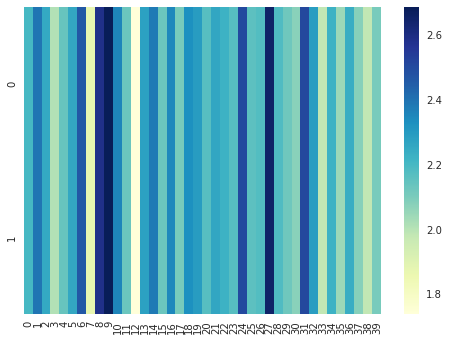

In [129]:
c_hmap=sns.heatmap([country_log10_mean,country_log10_mean],cmap="YlGnBu")
country_colors_rgb01=c_hmap.get_children()[0].get_facecolors()[0:40]

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

country_colors_hex=[  rgb_to_hex(tuple([int(255*i2) for i2 in i[0:3]])) for i in country_colors_rgb01]
country_codes = ['NG','JP','PK','US','FR','RU',\
                'ID','MX','RW','HT','JO','CU','LR','KP','SY','IQ','YE','UA','AF','TR',\
                'VE','EG','IR','SA','CN','IL','GR','NP','GB','NZ','DE','ES','TH','ZA',\
                'IN','AU','BR','CA','BE','NL']
print [round(i,2) for i in country_log10_mean]
print [round(i,2) for i in country_log10_sem]
print [i.lower() for i in country_codes]
print country_colors_hex